# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

İzzet Oğuz Bozak 05170000043

In [400]:
import pandas as pd


In [ ]:
survey=pd.read_csv("kaggle_survey_2020_responses.csv",skiprows=[1])
survey

In [349]:
survey=survey.drop(['Time from Start to Finish (seconds)'], axis=1)


In [350]:
survey=survey.rename(columns={"Q1":"Age", "Q2":"Gender", "Q3":"Country", "Q4":"Education", "Q5":"Occupation","Q6":"Coding Experience"})

In [351]:
satirSayisi=len(survey.axes[0])
print(satirSayisi)

20036


In [311]:
survey=survey.dropna(subset=["Education", "Occupation","Coding Experience"])

In [312]:
print("Silinen satır sayısı:",satirSayisi-len(survey.axes[0]))

Silinen satır sayısı: 916


In [313]:
print("Satır:",len(survey.axes[0])," Sütun:",len(survey.axes[1]))

Satır: 19120  Sütun: 354


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

<AxesSubplot:ylabel='Age'>

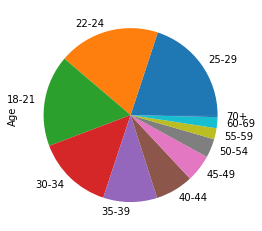

In [9]:
survey.Age.value_counts().plot(kind="pie")

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [ ]:
survey[survey.Country=="Turkey"].groupby("Education").count()

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [401]:
#pd.set_option('display.max_rows', 500)
survey.groupby("Age").Occupation.value_counts()

Age    Occupation               
18-21  Student                      2533
       Data Scientist                185
       Machine Learning Engineer     148
       Software Engineer             117
       Currently not employed         93
                                    ... 
70+    Business Analyst                1
       DBA/Database Engineer           1
       Data Engineer                   1
       Machine Learning Engineer       1
       Student                         1
Name: Occupation, Length: 143, dtype: int64

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [12]:
len(survey.axes[0])

19120

In [423]:
temp1=len(survey.axes[0])-survey.iloc[:,6:19].isnull().sum().sort_values()
temp1=temp1.rename({"Q7_Part_1" :"Python","Q7_Part_2" :"R","Q7_Part_3" :"SQL","Q7_Part_4" :"C","Q7_Part_5" :"C++","Q7_Part_6" :"Java","Q7_Part_7" :"JavaScript","Q7_Part_8" :"Julia"
            ,"Q7_Part_9" :"Swift","Q7_Part_10" :"Bash","Q7_Part_11" :"MATLAB","Q7_Part_12" :"None","Q7_OTHER" :"Other"})
temp1


Python        15530
SQL            7535
R              4277
C++            3827
Java           3367
C              3315
JavaScript     2995
MATLAB         2217
Other          1945
Bash           1776
Julia           262
None            206
Swift           198
dtype: int64

In [413]:
tempNo=len(survey[survey.Occupation=="Data Scientist"].axes[0])
tempNo

2676

In [414]:
survey.head()

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",Bayesian Approaches,Evolutionary Approaches,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,"Transformer Networks (BERT, gpt-3, etc)",None,Other,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q

In [421]:
#Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
temp2=tempNo-survey[survey.Occupation=="Data Scientist"].iloc[:,6:19].isnull().sum().sort_values()
temp2=temp2.rename({"Q7_Part_1" :"Python","Q7_Part_2" :"R","Q7_Part_3" :"SQL","Q7_Part_4" :"C","Q7_Part_5" :"C++","Q7_Part_6" :"Java","Q7_Part_7" :"JavaScript","Q7_Part_8" :"Julia"
            ,"Q7_Part_9" :"Swift","Q7_Part_10" :"Bash","Q7_Part_11" :"MATLAB","Q7_Part_12" :"None","Q7_OTHER" :"Other"})
temp2

Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
JavaScript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64

<AxesSubplot:title={'center':'Data Scientist için dil kullanımı'}>

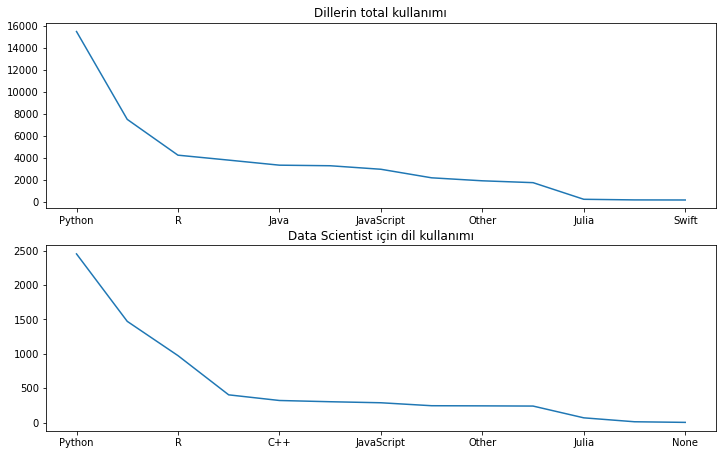

In [424]:
#Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.
import matplotlib.pyplot as plt
figure, axes = plt.subplots(2, 1)
temp1.plot(ax=axes[0],title="Dillerin total kullanımı")
temp2.plot(ax=axes[1],title="Data Scientist için dil kullanımı")



## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

In [19]:
deneyim_ds=survey[survey['Occupation'].str.contains('Data Scientist')].Q15

<AxesSubplot:>

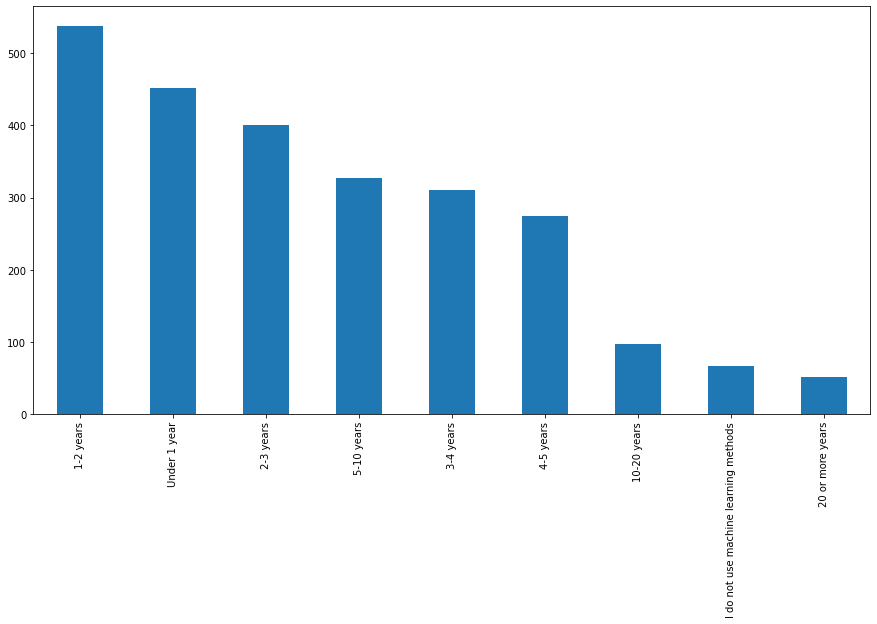

In [20]:
deneyim_ds.value_counts().plot(kind="bar")



## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [352]:
survey=survey.rename(columns={"Q17_Part_1":"Linear or Logistic Regression","Q17_Part_2":"Decision Trees or Random Forests","Q17_Part_3":"Gradient Boosting Machines (xgboost, lightgbm, etc)","Q17_Part_4":"Bayesian Approaches","Q17_Part_5":"Evolutionary Approaches","Q17_Part_6":"Dense Neural Networks (MLPs, etc)",
                                            "Q17_Part_7":"Convolutional Neural Networks","Q17_Part_8":"Generative Adversarial Networks","Q17_Part_9":"Recurrent Neural Networks","Q17_Part_10":"Transformer Networks (BERT, gpt-3, etc)","Q17_Part_11":"None","Q17_OTHER":"Other"})

In [353]:
survey[survey["Q16_Part_1"].fillna(0)!=0].filter(["Linear or Logistic Regression","Decision Trees or Random Forests",
                                                    "Gradient Boosting Machines (xgboost, lightgbm, etc)",
                                                    "Bayesian Approaches","Evolutionary Approaches","Dense Neural Networks (MLPs, etc)",
                                                   "Convolutional Neural Networks","Generative Adversarial Networks",
                                                     "Transformer Networks (BERT, gpt-3, etc)","None", "Other"]).count()

Linear or Logistic Regression                          8382
Decision Trees or Random Forests                       7340
Gradient Boosting Machines (xgboost, lightgbm, etc)    4507
Bayesian Approaches                                    2886
Evolutionary Approaches                                 523
Dense Neural Networks (MLPs, etc)                      2739
Convolutional Neural Networks                          4679
Generative Adversarial Networks                         792
Transformer Networks (BERT, gpt-3, etc)                1064
None                                                    211
Other                                                   292
dtype: int64

Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [354]:
survey[(survey.Q16_Part_1.fillna(0)!=0) & (survey.Q16_Part_2.fillna(0)!=0) & (survey.Q16_Part_3.fillna(0)!=0)].Age.count()

4406

## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [ ]:
survey["Q24"].unique()

In [362]:
survey.loc[(survey["Q24"]=="100,000-124,999"),"ConvertedComp"]=112500.0
survey.loc[(survey["Q24"]=='15,000-19,999'),"ConvertedComp"]=17500.0
survey.loc[(survey["Q24"]=='125,000-149,999'),"ConvertedComp"]=137500.0
survey.loc[(survey["Q24"]=='70,000-79,999'),"ConvertedComp"]=75000.0
survey.loc[(survey["Q24"]=='30,000-39,999'),"ConvertedComp"]=35000.0
survey.loc[(survey["Q24"]=='90,000-99,999'),"ConvertedComp"]=95000.0
survey.loc[(survey["Q24"]=='1,000-1,999'),"ConvertedComp"]=1500.0
survey.loc[(survey["Q24"]=='$0-999'),"ConvertedComp"]=500.0
survey.loc[(survey["Q24"]=='10,000-14,999'),"ConvertedComp"]=12500.0
survey.loc[(survey["Q24"]=='150,000-199,999'),"ConvertedComp"]=175000.0
survey.loc[(survey["Q24"]=='60,000-69,999'),"ConvertedComp"]=65000.0
survey.loc[(survey["Q24"]=='4,000-4,999'),"ConvertedComp"]=4500.0
survey.loc[(survey["Q24"]=='> $500,000'),"ConvertedComp"]=500000.0
survey.loc[(survey["Q24"]=='300,000-500,000'),"ConvertedComp"]=400000.0
survey.loc[(survey["Q24"]== '40,000-49,999'),"ConvertedComp"]=45000.0
survey.loc[(survey["Q24"]=='25,000-29,999'),"ConvertedComp"]=27500.0
survey.loc[(survey["Q24"]=='80,000-89,999'),"ConvertedComp"]=85000.0
survey.loc[(survey["Q24"]=='7,500-9,999'),"ConvertedComp"]=8750.0
survey.loc[(survey["Q24"]=='50,000-59,999'),"ConvertedComp"]=55000.0
survey.loc[(survey["Q24"]=='250,000-299,999'),"ConvertedComp"]=275000.0
survey.loc[(survey["Q24"]=='5,000-7,499'),"ConvertedComp"]=6250.0
survey.loc[(survey["Q24"]=='2,000-2,999'),"ConvertedComp"]=2500.0
survey.loc[(survey["Q24"]=='20,000-24,999'),"ConvertedComp"]=22500.0
survey.loc[(survey["Q24"]=='200,000-249,999'),"ConvertedComp"]=225000.0
survey.loc[(survey["Q24"]=='3,000-3,999'),"ConvertedComp"]=3500.0

In [363]:
sorted=survey[survey.ConvertedComp.isnull()==False].groupby("Occupation").mean().sort_values("ConvertedComp",ascending=False)
sorted

,ConvertedComp
Occupation,
Product/Project Manager,62362.711864
Data Scientist,54478.315263
Data Engineer,50225.609756
Other,46756.465517
DBA/Database Engineer,45872.767857
Research Scientist,45400.291829
Business Analyst,39512.536873
Software Engineer,38562.962963
Machine Learning Engineer,37625.816993


In [364]:
print("Ort max maaş alan meslek grubu :",sorted.index[0])

Ort max maaş alan meslek grubu : Product/Project Manager


In [365]:
for i in range(1,11):
    if(sorted.index[i]=="Data Scientist"):
        print("Data Scientist sıralaması:",i+1)

Data Scientist sıralaması: 2


Data Scientist olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık Data Scientist maaşlarını listeleyin.

In [366]:
survey[survey["Occupation"]=="Data Scientist"].groupby("Country").mean().sort_values("ConvertedComp",ascending=False).head(10)

,ConvertedComp
Country,
United States of America,142609.806630
Israel,111980.000000
Switzerland,109230.769231
Australia,104319.444444
United Kingdom of Great Britain and Northern Ireland,89750.000000
Germany,79804.687500
Ireland,78500.000000
Singapore,76937.500000
Canada,74466.981132


250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?


In [367]:
survey[(survey["Q20"]!="0-49 employees") & (survey["Q20"]!="50-249 employees")].ConvertedComp.mean()

56411.32254995243

Hesaplanan maaş (ConvertedComp) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [368]:
newlist=survey[["ConvertedComp","Country"]]
a=newlist.groupby("Country").mean()
b=newlist.groupby("Country").std()
c=newlist.groupby("Country").median()

In [369]:
merged_survey= pd.merge(a,b, on='Country')

In [370]:
merged_survey2.sort_values("Mean",ascending=False)

,Mean,Std,Median
Country,,,
United States of America,120322.102426,85088.103006,112500.0
Switzerland,120052.083333,54795.290175,112500.0
Israel,109757.812500,101749.936320,95000.0
Australia,87807.823129,70029.024487,85000.0
United Kingdom of Great Britain and Northern Ireland,82430.000000,77980.604451,65000.0
Germany,73634.765625,64869.102001,65000.0
Canada,73564.393939,55076.918594,75000.0
Netherlands,70603.982301,38504.894831,65000.0
United Arab Emirates,65777.777778,57151.792062,65000.0


In [371]:
merged_survey2=pd.merge(merged_survey,c,on="Country")
merged_survey2.rename(columns={"ConvertedComp_x":"Mean", "ConvertedComp_y":"Std","ConvertedComp":"Median"},inplace=True)
merged_survey2.sort_values("Mean",ascending=False)
for i in range(1,len(merged_survey2)):
    if(merged_survey2.index[i]=="Turkey"):
       print("Turkey için sıra numarası:",i+1)
merged_survey2.sort_values("Mean").loc["Turkey"]

Turkey için sıra numarası: 50


Mean      16692.771084
Std       43730.204618
Median     8750.000000
Name: Turkey, dtype: float64

## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

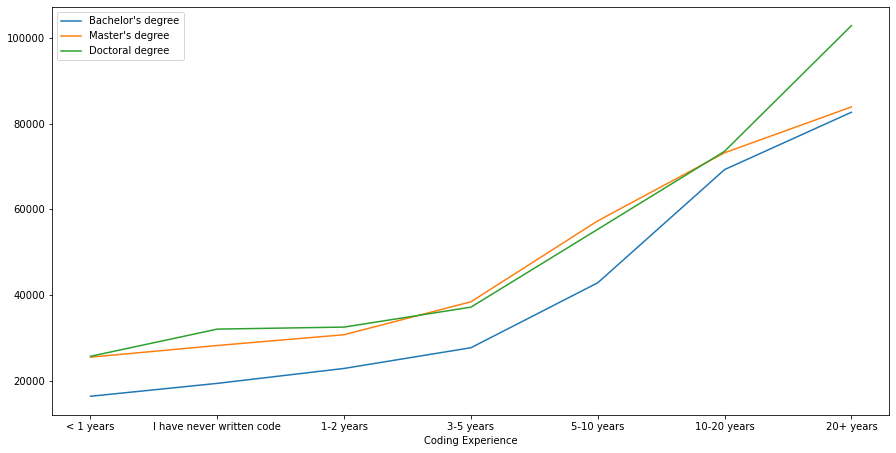

In [398]:
survey[survey.Education=="Bachelor’s degree"].groupby("Coding Experience").ConvertedComp.mean().sort_values().plot(label="Bachelor's degree")
survey[survey.Education=="Master’s degree"].groupby("Coding Experience").ConvertedComp.mean().sort_values().plot(label="Master's degree")
survey[survey.Education=="Doctoral degree"].groupby("Coding Experience").ConvertedComp.mean().sort_values().plot(label="Doctoral degree")
plt.legend()

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

In [ ]:
plt.figure(figsize=(20,25))
survey.loc[:,["Occupation","Gender"]].value_counts().plot(kind="barh")

In [ ]:
toplam_calisan=survey.Gender.value_counts().sum()
toplam_calisan

In [ ]:
kadin_sayisi=survey[survey["Gender"]=="Woman"]
kadin_orani=(kadin_sayisi.Occupation.value_counts()/toplam_calisan)*100
kadin_orani

In [ ]:
toplam_kadin_calismayan=survey[(survey["Gender"]=="Woman") & (survey["Occupation"]=="Currently not employed")].Gender.count()
toplam_erkek_calismayan=survey[(survey["Gender"]=="Man") & (survey["Occupation"]=="Currently not employed")].Gender.count()
toplam_kadin=survey[survey.Gender=="Woman"].Gender.count()
toplam_erkek=survey[survey.Gender=="Man"].Gender.count()


In [ ]:
kadin_oran=toplam_kadin_calismayan/toplam_kadin*100
erkek_oran=toplam_erkek_calismayan/toplam_erkek*100
print("Çalışmayan kadın oranı:",kadin_oran)
print("Çalışmayan erkek oranı",erkek_oran)

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [ ]:
survey[(survey["Gender"]=="Woman") &(survey["Coding Experience"]!="I have never written code") & (survey["Coding Experience"]!= "1 years")
      & (survey["Coding Experience"]!="1-2 years")].groupby("Country").count().sort_values("Age",ascending=False).head(1)

In [ ]:
survey[(survey["Gender"]=="Woman") & (survey["Country"]=="Turkey")].Education.value_counts().plot(kind="bar")

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [ ]:
pd.set_option("display.max_columns", None)
survey.head(3)

In [ ]:
survey.filter(like="Q39").replace(r" \(.*\)","",regex=True)

In [ ]:
sonuc=survey[survey.Age=="18-21"].filter(like="Q39").replace(r" \(.*\)","",regex=True).count().sort_values().idxmax()
if(sonuc=="Q39_Part_4") :sonuc="Kaggle"
sonuc

## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [402]:
country_info=pd.read_csv("CountryInfo.txt",skiprows=49,sep="\t",usecols=['#ISO', 'Country', 'neighbours'])
country_info=country_info.set_index("Country")

In [403]:
country_info.rename(columns={"#ISO":"Country Code"},inplace=True)

In [404]:
merged_survey= pd.merge(survey,country_info, on='Country')
merged_survey

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm, etc)",Bayesian Approaches,Evolutionary Approaches,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,Generative Adversarial Networks,Recurrent Neural Networks,"Transformer Networks (BERT, gpt-3, etc)",None,Other,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q

## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [405]:
komsu_ilk=merged_survey[merged_survey.Country=="Germany"]["neighbours"].iloc[0]
print(komsu_ilk.split(","))
komsu=komsu_ilk.split(",")
germany_komsu=merged_survey[((merged_survey.Country=="Germany")|(merged_survey["Country Code"].isin(komsu))) 
                            & (merged_survey["Education"]=="Doctoral degree")]

['CH', 'PL', 'NL', 'DK', 'BE', 'CZ', 'LU', 'FR', 'AT']


In [406]:
komsu_sayi=germany_komsu.groupby(["Country"]).count()
komsu_sayi.div(komsu_sayi.sum(axis=0),axis=1).multiply(100)["Education"]

Country
Belgium         5.038760
France         29.844961
Germany        39.147287
Netherlands     8.914729
Poland          8.527132
Switzerland     8.527132
Name: Education, dtype: float64